In [15]:
import axelrod as axl
import matplotlib.pyplot as plt
import seaborn
import csv
from sklearn.linear_model import LogisticRegression
import pandas
%matplotlib inline

In [26]:
alex, camille = axl.Alternator(), axl.TitForTat()
match = axl.Match([alex, camille], 10)
_ = match.play()
print(match.sparklines(c_symbol='😀', d_symbol='🎁'))

😀🎁😀🎁😀🎁😀🎁😀🎁
😀😀🎁😀🎁😀🎁😀🎁😀


In [86]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]
christmas = axl.Tournament(family, turns=50, repetitions=1)
results = christmas.play()
results.scores

[[525], [562], [417], [622], [646], [646]]

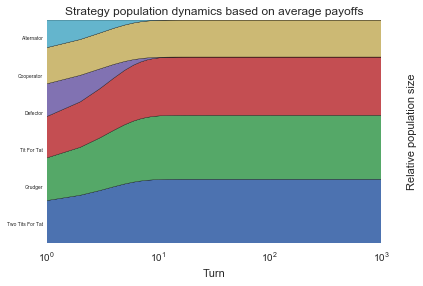

In [88]:
evo = axl.Ecosystem(results)
evo.reproduce(1000)
plot = axl.Plot(results)
p = plot.stackplot(evo);

In [36]:
p.savefig("../images/basic_christmas_evo.svg")

In [89]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]

def check_if_end_pop_cooperates(r=3,p=1,s=0,t=5, digits=5, family=family, turns=10000):
    game = axl.Game(r=r, p=p, s=s, t=t)
    christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
    results = christmas.play()
    evo = axl.Ecosystem(results)
    evo.reproduce(turns)
    last_pop = [round(pop, digits) for pop in evo.population_sizes[-1]]
    return last_pop[1] == last_pop[2] == 0, last_pop

In [90]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=5)

(True, [0.16576, 0.0, 0.0, 0.26105, 0.28659, 0.28659])

In [93]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=50)

(True, [0.0, 0.0, 0.0, 0.06083, 0.46958, 0.46958])

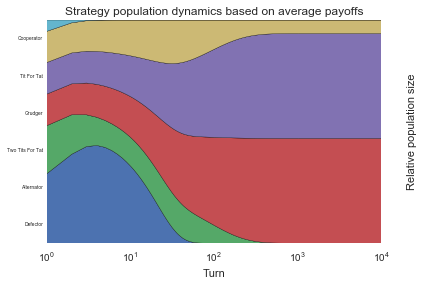

In [95]:
game = axl.Game(r=3, p=1, s=0, t=50)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_10_christmas_evo.svg")

In [96]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=500)

(False, [0.0, 1.0, 0.0, 0.0, 0.0, 0.0])

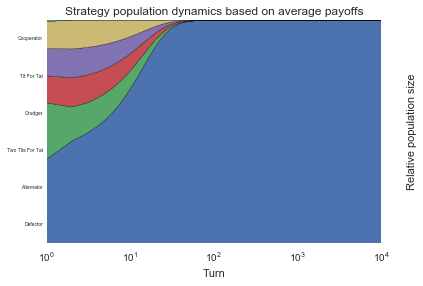

In [97]:
game = axl.Game(r=3, p=1, s=0, t=500)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_100_christmas_evo.svg")

# Analyse full data

In [116]:
df = pandas.read_csv("christmas.csv")
df.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,39210.000000,39210.000000,39210.000000,39210.000000,39210,39210.000000,39210.000000,39210.000000,39210.000000,39210.000000,39210.000000
mean,20.000989,9.840204,4.592095,41.093562,0.950089,0.095853,0.046340,0.000002,0.238547,0.309629,0.309629
std,15.603103,10.131277,6.237174,22.791364,0.217763,0.087540,0.210221,0.000100,0.073672,0.087736,0.087736
min,3.000000,1.000000,0.000000,5.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.100000,2.650794,0.800000,18.571429,1,0.001152,0.000000,0.000000,0.252112,0.272913,0.272913
50%,15.614286,5.954286,2.172995,38.928571,1,0.082560,0.000000,0.000000,0.262050,0.310270,0.310270
75%,29.347619,13.546032,5.793238,59.285714,1,0.182177,0.000000,0.000000,0.273860,0.357470,0.357470
max,68.200000,63.720000,59.472000,79.642857,True,0.247260,1.000000,0.010520,0.329840,0.494540,0.494540


## Simple frequency analysis

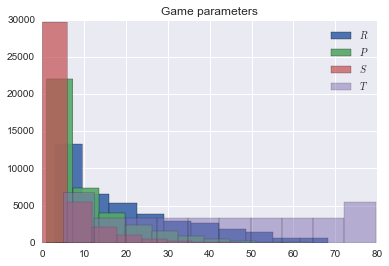

In [117]:
plt.figure()
plt.hist(df["R"], label="$R$")
plt.hist(df["P"], label="$P$", alpha=.9)
plt.hist(df["S"], label="$S$", alpha=.7)
plt.hist(df["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters");

In [118]:
df_promise = df[df["Promise"]==True]
df_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,37253.000000,37253.000000,37253.000000,37253.000000,37253,37253.000000,37253,37253,37253.000000,37253.000000,37253.000000
mean,20.790018,10.136786,4.729098,40.341526,1,0.100889,0,0,0.250895,0.324108,0.324108
std,15.593477,10.279484,6.350470,22.742940,0,0.086936,0,0,0.051340,0.055766,0.055766
min,3.000000,1.000000,0.000000,5.000000,True,0.000000,0,0,0.012580,0.250930,0.250930
25%,7.685714,2.767619,0.800000,18.571429,1,0.005170,0,0,0.253320,0.276710,0.276710
50%,16.600000,6.286667,2.267090,38.928571,1,0.094500,0,0,0.263120,0.314540,0.314540
75%,30.200000,14.074286,6.035556,59.285714,1,0.185970,0,0,0.274250,0.358790,0.358790
max,68.200000,63.720000,59.472000,79.642857,True,0.247260,0,0,0.329840,0.493710,0.493710


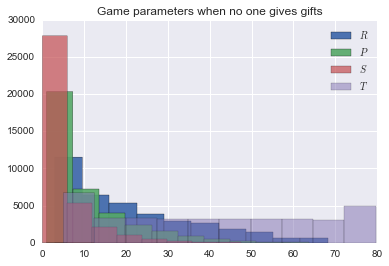

In [133]:
plt.figure()
plt.hist(df_promise["R"], label="$R$")
plt.hist(df_promise["P"], label="$P$", alpha=.9)
plt.hist(df_promise["S"], label="$S$", alpha=.7)
plt.hist(df_promise["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when no one gives gifts")
plt.savefig("../images/parameters_for_which_gifts_are_not_given.svg");

In [120]:
df_broken_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,1138.000000,1138.000000,1138.000000,1138.000000,1138,1138,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,4.674015,4.065217,1.944431,42.613608,0,0,0.926184,0.000032,0.003342,0.035221,0.035221
std,2.640614,2.631714,1.849186,13.473182,0,0,0.261582,0.000239,0.018590,0.125016,0.125016
min,3.000000,1.000000,0.000000,11.785714,False,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.333333,0.748487,32.142857,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.866667,1.472783,45.714286,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.847619,5.240000,2.380444,52.500000,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
max,18.009524,16.875556,12.481778,59.285714,False,0,1.000000,0.003330,0.300240,0.494270,0.494270


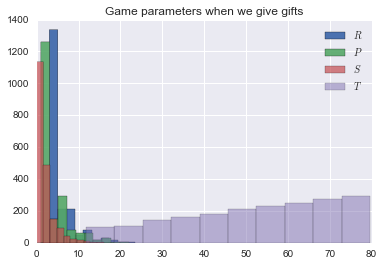

In [134]:
df_broken_promise = df[df["Promise"]==False]
plt.figure()
plt.hist(list(df_broken_promise["R"]), label="$R$")
plt.hist(list(df_broken_promise["P"]), label="$P$", alpha=.9)
plt.hist(list(df_broken_promise["S"]), label="$S$", alpha=.7)
plt.hist(list(df_broken_promise["T"]), label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when we give gifts")
plt.savefig("../images/parameters_for_which_gifts_are_given.svg");

In [125]:
X = df[df.columns[:4]]
y = df["Promise"]
model = LogisticRegression()
result = model.fit(X, y)

In [126]:
model.score(X, y)

0.98888038765621011

In [127]:
pandas.DataFrame(list(zip(X.columns, model.coef_[0])), columns=["Variables", "Coefficients"])

,Variables,Coefficients
0,R,4.682273
1,P,-4.464960
2,S,-0.030519
3,T,-0.142463


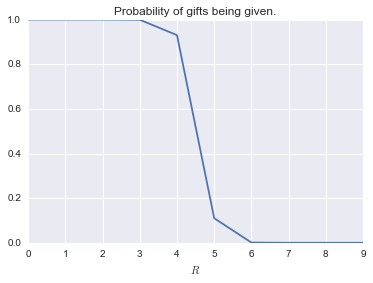

In [128]:
plt.figure()
x = range(10)
y = [model.predict_proba([[r,5,0,1]])[0][0] for r in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$R$");

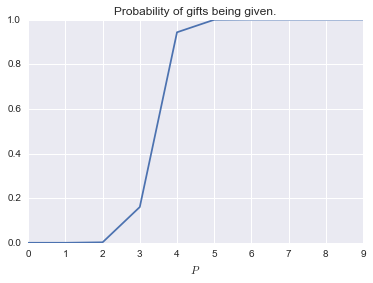

In [129]:
plt.figure()
x = range(10)
y = [model.predict_proba([[3,p,0,1]])[0][0] for p in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$P$");

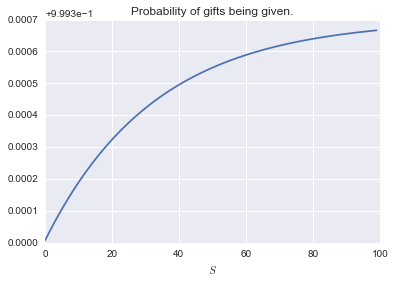

In [130]:
plt.figure()
x = range(100)
y = [model.predict_proba([[3,5,s,1]])[0][0] for s in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$S$");

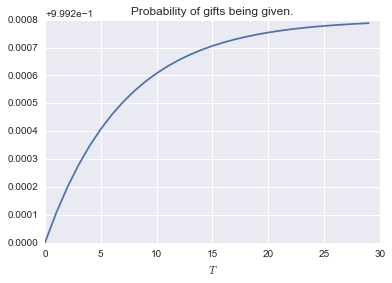

In [131]:
plt.figure()
x = range(30)
y = [model.predict_proba([[3,5,0,t]])[0][0] for t in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$T$");